# EDA ON LOAN APPLICATION DATA SET

Pandas is a Python toolkit for data manipulation and analysis.

Matplotlib is used for data visualiztion 

In [1]:
#importing the pandas and matplotlib libraries for the exploratory data analysis on the choosen dataset
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#reading the csv file into the file handle 'df' and then printing the head of the dataframe
df=pd.read_csv("loanapp.csv")
df.head()

,married,race,loan_decision,occupancy,loan_amount,applicant_income,num_units,num_dependants,self_employed,monthly_income,purchase_price,liquid_assets,mortage_payment_history,consumer_credit_history,filed_bankruptcy,property_type,gender
0,True,white,reject,1,128,74,1.0,1.0,False,4583,160.0,52.0,2,2,False,2,male
1,False,white,approve,1,128,84,1.0,0.0,False,2666,143.0,37.0,2,2,False,2,male
2,True,white,approve,1,66,36,1.0,0.0,True,3000,110.0,19.0,2,6,True,2,male
3,True,white,approve,1,120,59,1.0,0.0,False,2583,134.0,31.0,2,1,False,1,male
4,False,white,approve,1,111,63,1.0,0.0,False,2208,138.0,169.0,2,6,False,2,male


In [3]:
#printing the last few rows
df.tail()

,married,race,loan_decision,occupancy,loan_amount,applicant_income,num_units,num_dependants,self_employed,monthly_income,purchase_price,liquid_assets,mortage_payment_history,consumer_credit_history,filed_bankruptcy,property_type,gender
1983,True,white,approve,1,158,96,1.0,0.0,False,5000,176.0,15.0,2,1,False,2,male
1984,True,white,approve,1,35,169,1.0,0.0,False,9583,315.0,64.0,1,1,False,1,male
1985,True,white,approve,2,225,49,2.0,0.0,True,4159,225.0,10.0,2,1,False,3,male
1986,False,white,approve,1,98,110,1.0,0.0,True,9200,215.0,427.9,1,1,False,1,male
1987,False,black,reject,1,133,55,1.0,0.0,True,4583,148.0,24.5,2,3,False,2,female


<font color='blue'>The number of columns, column labels, column data types, memory use, range index, and the number of cells in each column are all included in the info() method(non-null values)..<font>

In [4]:
#printing information about the data frame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1988 entries, 0 to 1987
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   married                  1985 non-null   object 
 1   race                     1988 non-null   object 
 2   loan_decision            1988 non-null   object 
 3   occupancy                1988 non-null   int64  
 4   loan_amount              1988 non-null   int64  
 5   applicant_income         1988 non-null   int64  
 6   num_units                1984 non-null   float64
 7   num_dependants           1985 non-null   float64
 8   self_employed            1988 non-null   bool   
 9   monthly_income           1988 non-null   int64  
 10  purchase_price           1988 non-null   float64
 11  liquid_assets            1988 non-null   float64
 12  mortage_payment_history  1988 non-null   int64  
 13  consumer_credit_history  1988 non-null   int64  
 14  filed_bankruptcy        

### Dropping duplicate rows

<font color='blue'>This is typically useful since we may have duplicate data that is bothersome, thus we need to delete all duplicate values from the data set.</font>


In [5]:
#Creating a new dataframe to store the duplicate rows of the dataset
duplicate_rows_df = df[df.duplicated()]
print('number of duplicate rows:', duplicate_rows_df.shape)
duplicate_rows_df

number of duplicate rows: (1, 17)


,married,race,loan_decision,occupancy,loan_amount,applicant_income,num_units,num_dependants,self_employed,monthly_income,purchase_price,liquid_assets,mortage_payment_history,consumer_credit_history,filed_bankruptcy,property_type,gender
458,False,white,approve,1,136,64,1.0,0.0,False,5316,170.0,46.0,2,1,False,2,male


<font color='blue'>By the output, it is evident that there is only one duplicate row in the dataset.</font>

In [6]:
# Dropping the duplicates 
df = df.drop_duplicates()
df.shape

(1987, 17)

<font color='blue'>So, now the only duplicate row has been deleted.</font>

# Step1

In [7]:
df.describe()

,occupancy,loan_amount,applicant_income,num_units,num_dependants,monthly_income,purchase_price,liquid_assets,mortage_payment_history,consumer_credit_history,property_type
count,1987.000000,1987.000000,1987.000000,1983.000000,1984.000000,1987.00000,1987.000000,1987.000000,1987.000000,1987.000000,1987.000000
mean,1.031706,143.276296,84.694514,1.122542,0.771673,5195.16004,196.317326,4622.636004,1.708103,2.110720,1.861097
std,0.191725,80.551577,87.100460,0.437416,1.104606,5271.68696,128.166926,67159.759499,0.555436,1.663488,0.535574
min,1.000000,2.000000,0.000000,1.000000,0.000000,0.00000,25.000000,0.000000,1.000000,1.000000,1.000000
25%,1.000000,100.000000,48.000000,1.000000,0.000000,2875.50000,129.000000,20.000000,1.000000,1.000000,2.000000
50%,1.000000,126.000000,64.000000,1.000000,0.000000,3812.00000,163.000000,38.000000,2.000000,1.000000,2.000000
75%,1.000000,165.000000,88.000000,1.000000,1.000000,5595.00000,225.000000,83.000000,2.000000,2.000000,2.000000
max,3.000000,980.000000,972.000000,4.000000,8.000000,81000.00000,1535.000000,1000000.000000,4.000000,6.000000,3.000000


<font color='blue'>The describe() method returns a description of the DataFrame's numerical data.
count - The number of not-empty values.

average (mean) - average (mean) value..

std -  standard deviation.

min -  minimum value.

25% - 25% percentile*, Q1 (first Quartile).

50% -  50th percentile*,  Median.

75% -  75th percentile*,  Q2 (second Quartile).

max -  maximum value.</font>


# Step2

<font color='blue'>
df.isnull(). sum() returns the number of missing values in each column of the data set.

In [8]:
df.isnull().sum()

married                     3
race                        0
loan_decision               0
occupancy                   0
loan_amount                 0
applicant_income            0
num_units                   4
num_dependants              3
self_employed               0
monthly_income              0
purchase_price              0
liquid_assets               0
mortage_payment_history     0
consumer_credit_history     0
filed_bankruptcy            0
property_type               0
gender                     14
dtype: int64

<font color='blue'>We can see that there are 4 columns – gender, married, num_dependents,num_units having missing values.</font>

In [9]:
#Finding the total number of missing values from the entire dataset
print(f"Total number of missing values in the entier dataset are:",df.isnull().sum().sum())

Total number of missing values in the entier dataset are: 24


### Two primary ways of handling missing values:

<font color='blue'>Deleting Missing Values:

This strategy isn't encouraged. It's one of the quick-and-dirty methods for dealing with missing values.
The drawback of this strategy is that it may result in the deletion of some useful data from the dataset.

<font color='blue'>Imputing the Missing Values:

<font color='blue'>1)Fill in the mode for each categorical value.

Mode is the most frequently occurring value. It is used in the case of categorical features.

Here ‘fillna’ method is used for imputing the categorical columns ‘Gender’ and ‘Married’.


In [10]:
#Replace the missing values for categorical columns with mode
df['gender'] = df['gender'].fillna(df['gender'].mode()[0])
df['married'] = df['married'].fillna(df['married'].mode()[0])
df.isnull().sum()

married                    0
race                       0
loan_decision              0
occupancy                  0
loan_amount                0
applicant_income           0
num_units                  4
num_dependants             3
self_employed              0
monthly_income             0
purchase_price             0
liquid_assets              0
mortage_payment_history    0
consumer_credit_history    0
filed_bankruptcy           0
property_type              0
gender                     0
dtype: int64

### Detecting Outliers for num_units and num_dependants columns

<font color='blue'>2)Fill in the mean or median of a numerical variable.

Seaborn is a Python module for creating statistical visuals.

<Axes: xlabel='num_units'>

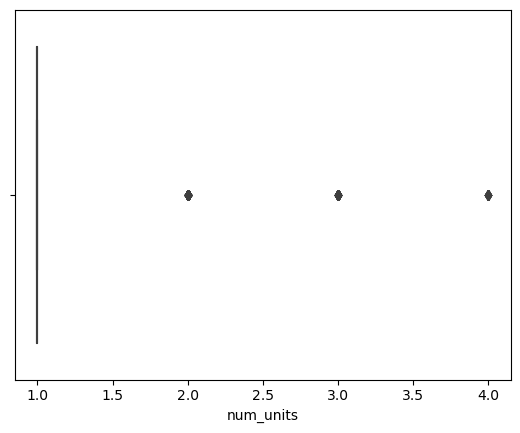

In [11]:
#importing seaborn library to plot boxplot and determine the presence of outlier
import seaborn as sns
sns.boxplot(x=df['num_units'])

<Axes: xlabel='num_dependants'>

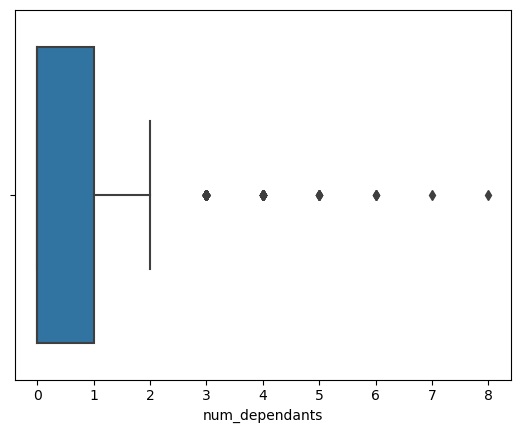

In [12]:
sns.boxplot(x=df['num_dependants'])

<font color='blue'>Both the above graphs shows the presence of outliers.Hence, we cannot use the mean values of the columns to impute the missing values as the impact would be significant.
    
And using the median might result in an non-integer value.So, we will use the forward fill method to impute the missing values.</font>

In [13]:
#The fillna() method replaces NULL values with a value that you specify.
df['num_units']= df['num_units'].fillna(method='ffill')
df['num_dependants']= df['num_dependants'].fillna(method='ffill')
print(f"Total number of missing values in the entier dataset are:",df.isnull().sum().sum())

Total number of missing values in the entier dataset are: 0


<font color='blue'>All the missing values are now filled with appropriate values 

# Step3

<font color='blue'>Histogram is used to visualise the distribution of different continuous variables.

a)As it aids in determining and comparing the frequency 

b)It is easier to interpret data since it is a pictorial depiction 

c)A big volume of data may be evaluated because data range is used.

Furthermore, the kde plot is employed because it creates a gaussian bell curve over each unique sample value. The final curve is created by adding all of the bell curves together.

count     1987.00000
mean      5195.16004
std       5271.68696
min          0.00000
25%       2875.50000
50%       3812.00000
75%       5595.00000
max      81000.00000
Name: monthly_income, dtype: float64


Text(0.5, 1.0, 'monthly_income Distribution')

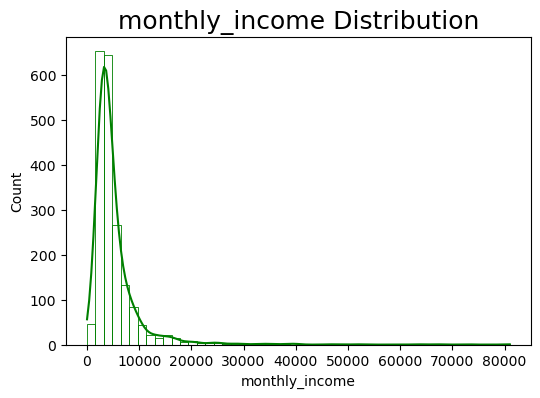

In [14]:
#printing the statistics and plotting the ditribution of the column 'Monthly_Income'
print(df['monthly_income'].describe())
plt.figure(figsize=(6,4))
sns.histplot(df['monthly_income'], color='g', fill=False,bins=50,kde=True)
plt.title('monthly_income Distribution', fontsize=18)

<font color='blue'>From the above descriptive table we can infer that the average monthly income of the sample is 5195.220825, and the graph depicts maximum number of people with similar monthly income populated around that average(Almost 75% of people below 5594.500000). A very few people with a high income indicating the outliers.

count    1987.000000
mean      143.276296
std        80.551577
min         2.000000
25%       100.000000
50%       126.000000
75%       165.000000
max       980.000000
Name: loan_amount, dtype: float64


Text(0.5, 1.0, 'loan_amount Distribution')

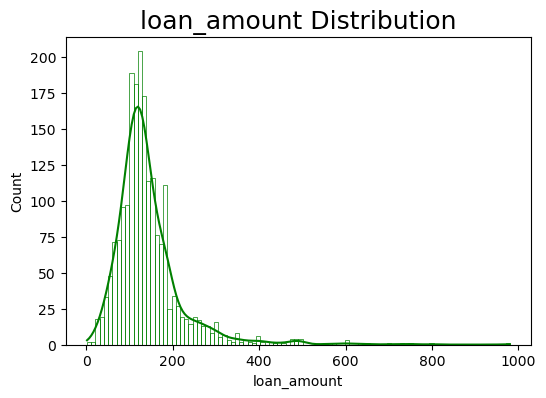

In [15]:
#printing the statistics and plotting the ditribution of the column 'Loan_amount'
print(df['loan_amount'].describe())
plt.figure(figsize=(6,4))
sns.histplot(df['loan_amount'], color='g', fill=False,bins=100,kde=True)
plt.title('loan_amount Distribution', fontsize=18)

<font color='blue'>From the above descriptive table we can infer that the average loan amount sanctioned by the bank for the given sample is 143.272636, and the graph depicts maximum number of people with similar monthly income populated around that average(Almost 75% of people below 165). A very few people with a high loan amount indicating the outliers.

# Step4

<font color='blue'>A scatter plot shows a relationship and a trend with respect to two variables.
It gives the direction, whether there is positive or negative type of correlation.

[Text(0.5, 1.0, 'Loan Amount vs Applicant Income')]

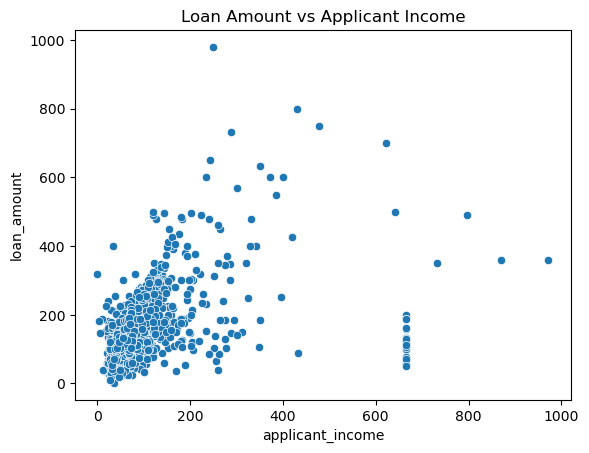

In [16]:
#plotting Scatter plots with loan_amount and Monthly_income
sns.scatterplot(x=df['applicant_income'],y=df['loan_amount']).set(title='Loan Amount vs Applicant Income')

<font color="blue">The above graph shows a positive correlation between loan_amount and applicant_income.This gives the direction of correlation and states that loan amount increases with increase in applicants income 

In [17]:
print(f"The correlation between monthly_income and purchase_price is:",
      df['loan_amount'].corr(df['applicant_income'],method='pearson'))

The correlation between monthly_income and purchase_price is: 0.43340178058988926


<font color='blue'>Pearson’s correlation coefficient :It gives information about the magnitude of the association, or correlation, as well as the direction of the relationship.

<font color='blue'>Here the coefficient value lies between ± 0.0 and ± 0.5 hence it has a week correlation.

# Step 5

In [18]:
#Finding the unique value of the gender column
df['gender'].unique()

array(['male', 'female'], dtype=object)

In [19]:
#Finding the unique value of the race column
df['race'].unique()

array(['white', 'black', 'hispan'], dtype=object)

In [20]:
#Finding the unique value of the Loan_decision column
df['loan_decision'].unique()

array(['reject', 'approve'], dtype=object)

# Step 6

<font color='blue'>To determine the dependency, Chi-Square Test is conducted (Since categorical variables).

    
Null Hypothesis--> H0: Loan Decision is 'Not' dependent on Filed Bankruptcy

    

    
Alternative Hypothesis--> H1: Loan Decision is dependent on Filed Bankruptcy

Test Choosen: Chi-Square Test</font>

In [21]:
#Creating a tally_table with the help of pandas crosstab function.
tally_table=pd.crosstab(df['filed_bankruptcy'],df['loan_decision'])
tally_table

loan_decision,approve,reject
filed_bankruptcy,,
False,1667,183
True,76,61


<Axes: xlabel='filed_bankruptcy'>

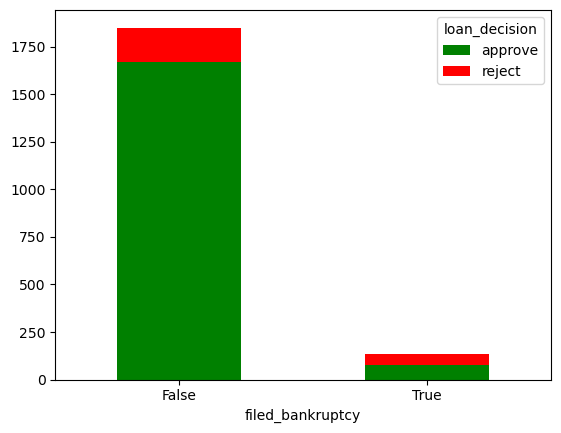

In [22]:
tally_table.plot(kind="bar", stacked=True, rot=0, color={'reject':'red','approve':'green'})

<font color='blue'>We can deduce the following from the graph:
    
Majority of the loan applications were not rejected of appplicants who didn't file for the Bankruptcy or Majority of applicants with no Bankruptcy were approved the loan.

In [23]:
#importing scipy library in order to perform the chi-square test
from scipy import stats

In [24]:
#Using the chi2 contingency function of the stats model to implement Chi-Square test and passing tally_table to it
chi2, p_val, dof ,expected =stats.chi2_contingency(tally_table)
print(f"P value is: {p_val}")

P value is: 4.77550771609102e-32


<font color='blue'>If p_val>alpha: Failed to reject the Null Hypothesis

If p_val<alpha: Reject the Null Hypothesis.</font>

In [25]:
"""Comparing the P-value with level of significance, 
in order to take a decision on Rejecting the Null Hypothesis or Failing to reject the Null Hypothesis"""

level_of_significance=0.05
if p_val>level_of_significance:
    print('Failed to reject the Null hypothesis.Hence, Loan Decision is "Not" dependent on Filed Bankruptcy.')
else:
    print("Reject the Null hypothesis.Hence, Loan Decision is dependent on Filed Bankruptcy.")

Reject the Null hypothesis.Hence, Loan Decision is dependent on Filed Bankruptcy.


<font color='blue'>The p val is substantially smaller than the level of significance in this case. As a result, the "Null Hypothesis is rejected and the Alternate Hypothesis is accepted".


So we can infer that, the bank does take the filed Bankruptcy into consideration while making the loan decision.</font>

# Step 7

<font color='blue'>The following code creates a subset of Loan Amount data for all the black male in the population</font>

In [26]:
subset1=df[(df['race']=='black')  & (df['gender'] == 'male')]['loan_amount']
subset1.describe()

count    146.000000
mean     143.246575
std       73.176929
min       45.000000
25%      108.000000
50%      130.000000
75%      161.500000
max      732.000000
Name: loan_amount, dtype: float64

In [27]:
#Presenting the descriptive statistics on the above created subset
mean1=subset1.mean()
print(f"The average loan amount sanctioned for a black male by the bank is:{round(mean1,2)} pounds")

The average loan amount sanctioned for a black male by the bank is:143.25 pounds


<font color='blue'>The following code creates a subset of Loan Amount data for all the black females in the population</font>

In [28]:
subset2=df[(df['race']=='black')  & (df['gender'] == 'female')]['loan_amount']
subset2.describe()

count     51.000000
mean     116.137255
std       40.196527
min       40.000000
25%       91.000000
50%      112.000000
75%      132.000000
max      280.000000
Name: loan_amount, dtype: float64

In [29]:
#Presenting the descriptive statistics on the above created subset
mean2=subset2.mean()
print(f"The average loan amount sanctioned for a black female by the bank is:{round(mean2,2)} pounds")

The average loan amount sanctioned for a black female by the bank is:116.14 pounds


# Step 8

<font color='blue'>To determine the difference between the means of two subsets of the data, we must independent two-sample t-test.

Independent two sample t_test is used as it compares whether the average difference between two groups is really significant or if it is due to random chance.


Null Hypothesis--> H0: 'No' significant difference between the means of the two subset(Are equal).

Alternative Hypothesis--> H1: Significant difference between the means of the two subset("Not" equal).
Test Choosen: independent two-sample t-test</font>

In [30]:
#conducting independent sample t test to find the difference in means of the subsets
t_val,p_val=stats.ttest_ind(subset1,subset2)
print(f't_val={t_val} and p_val={p_val}')

t_val=2.5136935150859587 and p_val=0.012756571193785284


If p_val>alpha: Failed to reject the Null Hypothesis

If p_val<alpha: Reject the Null Hypothesis<\font>

In [31]:
"""Comparing the P-value with level of significance, 
in order to take a decision on Rejecting the Null Hypothesis or Failing to reject the Null Hypothesis"""

level_of_significance=0.05
if p_val>level_of_significance:
    print('Failed to reject the Null hypothesis.Hence, "No" significant difference between the means of the two subset')
else:
    print("Reject the Null hypothesis.Hence, Significant difference between the means of the two subset.")

Reject the Null hypothesis.Hence, Significant difference between the means of the two subset.


<font color='blue'>We can see that the p value is smaller than the significance value,Hence we reject the Null hypothesis.
    
Here (µ1 ≠ µ2).So we can infer that, the average loan amount sanctioned by the bank for a black male and average loan amount sanctioned by the bank for a black female have a significant difference.</font>

# Step 9

In [32]:
df

,married,race,loan_decision,occupancy,loan_amount,applicant_income,num_units,num_dependants,self_employed,monthly_income,purchase_price,liquid_assets,mortage_payment_history,consumer_credit_history,filed_bankruptcy,property_type,gender
0,True,white,reject,1,128,74,1.0,1.0,False,4583,160.0,52.0,2,2,False,2,male
1,False,white,approve,1,128,84,1.0,0.0,False,2666,143.0,37.0,2,2,False,2,male
2,True,white,approve,1,66,36,1.0,0.0,True,3000,110.0,19.0,2,6,True,2,male
3,True,white,approve,1,120,59,1.0,0.0,False,2583,134.0,31.0,2,1,False,1,male
4,False,white,approve,1,111,63,1.0,0.0,False,2208,138.0,169.0,2,6,False,2,male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1983,True,white,approve,1,158,96,1.0,0.0,False,5000,176.0,15.0,2,1,False,2,male
1984,True,white,approve,1,35,169,1.0,0.0,False,9583,315.0,64.0,1,1,False,1,male
1985,True,white,approve,2,225,49,2.0,0.0,True,4159,225.0,10.0,2,1,False,3,male
1986,False,white,approve,1,98,110,1.0,0.0,True,9200,215.0,427.9,1,1,False,1,male


In [33]:
'''The following code groups the data considering the married 
and the filed bankruptcy attributtes and displays the mean and median of loan_amount feature of the data'''
group1 = df.groupby(['married','filed_bankruptcy']).aggregate({'loan_amount':['median','mean']})
group1

loan_amount            
                              median        mean
married filed_bankruptcy                        
False   False                  115.0  121.340223
        True                   120.0  142.829787
True    False                  132.0  153.671581
        True                   139.0  155.788889

<font color='blue'>The above table includes the mean and median values of all the columns with respcet to the groups made on the married and filed_bankruptcy categorical variable. 

In [34]:
'''The following code groups the data considering the married 
and the filed bankruptcy attributtes and displays the count of each table'''
df.groupby(['married','filed_bankruptcy']).count()

race  loan_decision  occupancy  loan_amount  \
married filed_bankruptcy                                                
False   False              629            629        629          629   
        True                47             47         47           47   
True    False             1221           1221       1221         1221   
        True                90             90         90           90   

                          applicant_income  num_units  num_dependants  \
married filed_bankruptcy                                                
False   False                          629        629             629   
        True                            47         47              47   
True    False                         1221       1221            1221   
        True                            90         90              90   

                          self_employed  monthly_income  purchase_price  \
married filed_bankruptcy                                                  
False   False                       629             629             629   
        True                         47              47              47   
True    False                      1221            1221            1221   
        True                         90              90              90   

                          liquid_assets  mortage_payment_history  \
married filed_bankruptcy                                           
False   False                       629                      629   
        True                         47                       47   
True    False                      1221                     1221   
        True                         90                       90   

                          consumer_credit_history  property_type  gender  
married filed_bankruptcy                                                  
False   False                                 629            629     629  
        True                                   47             47      47  
True    False                                1221           1221    1221  
        True                                   90             90      90

<font color='blue'>The above table includes the count of all the columns with respcet to the groups made on the married and filed_bankruptcy categorical variable.

# Step 10

<font color='blue'>replace() method just replaces the categories with the desired numbers. This enables us to consider the categorical variables in the multiple linear regression model.

In [35]:
#Encoding the categorical features to numeric quantities.
df["married"].replace({True: 1, False: 0}, inplace=True)
df["race"].replace({"white": 0, "black": 1,"hispanic": 2}, inplace=True)
df["loan_decision"].replace({"approve": 1, "reject": 0}, inplace=True)
df["self_employed"].replace({True: 1, False: 0}, inplace=True)
df["filed_bankruptcy"].replace({True: 1, False: 0}, inplace=True)
df["gender"].replace({"male": 1, "female": 0}, inplace=True)
df.head()

,married,race,loan_decision,occupancy,loan_amount,applicant_income,num_units,num_dependants,self_employed,monthly_income,purchase_price,liquid_assets,mortage_payment_history,consumer_credit_history,filed_bankruptcy,property_type,gender
0,1,0,0,1,128,74,1.0,1.0,0,4583,160.0,52.0,2,2,0,2,1
1,0,0,1,1,128,84,1.0,0.0,0,2666,143.0,37.0,2,2,0,2,1
2,1,0,1,1,66,36,1.0,0.0,1,3000,110.0,19.0,2,6,1,2,1
3,1,0,1,1,120,59,1.0,0.0,0,2583,134.0,31.0,2,1,0,1,1
4,0,0,1,1,111,63,1.0,0.0,0,2208,138.0,169.0,2,6,0,2,1


In [36]:
#Importing Stats Library for building the Linear Regression Model
import statsmodels.api as sm

In [37]:
model = sm.OLS.from_formula(
    'loan_amount ~ married+applicant_income+mortage_payment_history	+purchase_price+filed_bankruptcy', data=df).fit()

In [38]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            loan_amount   R-squared:                       0.702
Model:                            OLS   Adj. R-squared:                  0.702
Method:                 Least Squares   F-statistic:                     935.1
Date:                Thu, 07 Dec 2023   Prob (F-statistic):               0.00
Time:                        00:15:03   Log-Likelihood:                -10336.
No. Observations:                1987   AIC:                         2.068e+04
Df Residuals:                    1981   BIC:                         2.072e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  33.1604      4.133      8.023      0.000      25.054      41.266
married                     5.8582      2.131      2.749      0.006       1.679      10.038
applicant_income            0.0645      0.013      5.072      0.000       0.040       0.089
mortage_payment_history     0.9794      1.829      0.536      0.592      -2.607       4.566
purchase_price              0.5017      0.009     56.646      0.000       0.484       0.519
filed_bankruptcy            8.8855      3.910      2.272      0.023       1.217      16.554
==============================================================================
Omnibus:                      805.625   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            86617.783
Skew:                          -0.918   Prob(JB):                         0.00
Kurtosis:                      35.293   Cond. No.                     1.16e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.16e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<font color='blue'>Based on the indications on the coefficients, we may conclude that all the independant variables impact the loan_amount in a positive manner.

<font color='blue'>All the independent variables considered for the regression models are significant as the significance values for all are less than 0.05.  

<font color='red'>$R^2$ value for the derived model is 0.705,it states that the independent variables accounts for 70% of the variation in the dependent variable.

# Residual Analysis

In [39]:
'''Explaination:

The residuals of regression are a key means of determining if a regression, 
whether simple or multiple, has achieved its purpose of explaining as much variance in a dependent variable 
as feasible while maintaining the underlying assumption.

All residuals should, in theory, be tiny and unstructured, 
indicating that the regression analysis has succeeded 
in explaining the majority of the variance in the dependant variable.'''
print('Proceeding with the residual analysis')

Proceeding with the residual analysis


In [40]:
#importing bokeh library to build visualization for the residual analysis
from bokeh.plotting import figure
from bokeh.io import show
from bokeh.io import output_notebook
output_notebook()

Loading BokehJS ...

In [41]:
residual_graph = figure(height=250, width=500)
# X axis is the predicted standardized values
# Y axis is the standardized residuals values
#Calculating the influence and outlier measures by taking the fitted values and residuals values.
st_resids = model.get_influence().resid_studentized_internal
residual_graph.circle(model.fittedvalues, st_resids)
show(residual_graph)

In [42]:
import numpy as np

# create a histogram with 40 bins
hist, edges = np.histogram(st_resids, bins=40)

In [43]:
#plotting normal distribution of residual to check whether they are normally distributed
normal_distribution = figure(height=250, width=500)
normal_distribution.quad(top=hist, bottom=0, left=edges[:-1], right=edges[1:], line_color="white")
show(normal_distribution)

## Assumption1- Zero means of Errors
We can see from the above graph that the residuals are uniformly distributed i.e equally present above and beloww 0.
## Assumption2- Normally distribution of errors
THe graph looks to be normally distributed but Jarque-Bera test on the residuals shows that errors are not distributed normally as the p-value equals 0.000. Hence we reject the null hypothesis and say that residuals are not normally distributed.